In [1]:
import matplotlib.pyplot as plt
import numpy as np

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Instructions</a></span></li><li><span><a href="#Readings" data-toc-modified-id="Readings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Readings</a></span></li><li><span><a href="#Solow-Swan-Model" data-toc-modified-id="Solow-Swan-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solow-Swan Model</a></span><ul class="toc-item"><li><span><a href="#Model-equilibrium-description" data-toc-modified-id="Model-equilibrium-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model equilibrium description</a></span></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><span><a href="#Simulation-of-equilibrium-outcomes" data-toc-modified-id="Simulation-of-equilibrium-outcomes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Simulation of equilibrium outcomes</a></span></li></ul></li></ul></div>

# Instructions

1. Use this notebook to provide your solutions. 

2. Submit executable notebook (``.ipynb`` file) to the course GitHub Classroom assignment using your linked GitHub account.

3. Download a copy of your notebook to HTML and then save that as a PDF file. Upload that PDF file to the course Wattle assignment's *Turnitin*.

# Readings

* Daron Acemoglu, *Introduction to Modern Economic Growth*

* David Romer, *Advanced Macroeconomics*

* Charles I. Jones, *Macroeconomics*.



# Solow-Swan Model

Time is assumed to be infinite but discrete: $t \in \{ 0, 1, 2, ... \} \equiv \mathbb{N}$.

The model assumes that people consume a constant fraction $0 < m < 1$ of their income flow $Y_{t}$ every period $t$:

$$
C_{t} = m Y_{t}.
$$

Income (or output) is generated from a production function $F$ that uses labor ($L_{t}$) and capital ($K_{t}$):

$$
Y_{t} = F(K_{t}, L_{t}) = AK_{t}^{\alpha} L_{t}^{1-\alpha},
$$

where $A > 0$ and $0 < \alpha < 1$.

Assume that capital is produced using this accumulation technology:

$$
      K_{t+1} = (1-\delta)K_{t} + I_{t},
$$
where $0 < \delta < 1$ and $I_{t}$ is new investment into capital goods.

Labor supply:

$$
L_{t} = 1,
$$

where population size is 1.

From national accounting identity:

$$
I_{t} = Y_{t} - C_{t}.
$$

## Model equilibrium description

We can do a bit of algebra to simplify the system of five equations and five unknown variables above to one equation:

Rewrite consumption as:

$$
C_{t} = m AK_{t}^{\alpha} L_{t}^{1-\alpha} = m AK_{t}^{\alpha}.
$$

Rewrite investment as 

$$
I_{t} = (1-m)Y_{t} = (1-m)AK_{t}^{\alpha}.
$$

Using last equation, we have

$$
K_{t+1} = (1-\delta)K_{t} + sAK_{t}^{\alpha} \equiv g(K_{t}),
$$

where $s = (1-m)$.

This describes a *dynamic equilibrium* of the model. It is a first-order difference equation in $K$.

**Definition.** A *dynamic equilibrium* is a sequence of allocation outcomes $(K_{1}, K_{2},..., K_{t}, ...)$ that satisfies 

$$
K_{t+1} = (1-\delta)K_{t} + sAK_{t}^{\alpha} \equiv g(K_{t}),
$$

given an initial state $K_{0}$.

# Assignment

In [2]:
# Model parameters
# =========================

K0 = 0.1
α = 0.33
δ = 0.10
A = 10.0
s = 0.25
L = 1.0

In [3]:
# Model primitive functions
# =========================

# Production function
def F(K, L=1.0, A=1.0, α=0.33):
    """Cobb-Douglas production function"""
    Y = A*(K**α)*(L**(1-α))
    return Y

# Equilibrium map/function g
def g(K, L=1.0, A=1.0, α=0.33, δ=0.05, s=0.123):
    """Solow-Swan (simple version)
    Equilibrium transition function.
    """
    K_next = (1-δ)*K + s*F(K, L, A, α)
    return K_next

**QUESTION 0.** 

1. Plot the function $g$ in a diagram with $K_{t}$ and $K_{t+1}$ on the horizontal and vertical axes, respectively.

2. Superimpose the graph of a 45-degree line in the same diagram.

3. What is this graphical device called? What is it useful for? Provide an example to illustrate its use. (Hint: This is stuff from your undergraduate or first-year Masters macro class.)

**Answer 0.1 and 0.2.**

In [4]:
# Questions 0-1 and 0-2: Your code here
K_path = []
K = K0

def serial_correlation(l):
    # Generate x and y axis from the list
    x = l[:-1]
    y = l[1:]
    plt.plot(x, y)


# Generate the path of K according to function g. Keep adding elements into the list until the function g repeats itself
while (K in K_path) == False:
    K_path.append(K)
    K = g(K, L, A, α, δ, s)


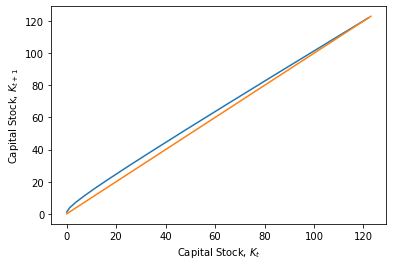

In [5]:
# Plot the serial correlation graph of K
serial_correlation(K_path)

# Plot the 45-degree line
plt.plot([0, 123], [0, 123])
plt.ylabel('Capital Stock, $K_{t+1}$')
plt.xlabel('Capital Stock, $K_{t}$')
plt.show()

**Answer 0.3.**

This is a serial-correlation graph. It shows how the varieble in this period would affect the same varieble in the next period. When the curve is above the 45-degree line, the varieble is increasing on $K_{t}$. The farther the curve is from the 45-degree line, the faster the variable is increasing. An interception of the serial-correlation curve and the 45-degree line is a equilibrium.
For example, in this case, such graph can be used to show the equilibrium level of $K$ in the Solow-Swan model. It can also be used to examine the existence of auto-correlation in the data series, while being plotted in scatter form.

## Simulation of equilibrium outcomes

In [6]:
# Example 1: Evaluate F at (K,L) default parameters
F(1.5, 1)

1.1431681486535354

In [7]:
# Example 2: Evaluate F at (K,L) new parameters
F(1.5, 1., A=101., α=0.25)

111.77487388973248

**QUESTION 1**. Write code to simulate the model's dynamic equilibrium *outcome* of capital stock, consumption, output/income and investment for ``T = 200`` periods:

**Answer 1.**

In [8]:
# Question 1: Your code here - use the comment headings as suggestive guide

# Simulating the equilibrium
# ==========================================================

# Length of time path to simulate
T = 200

# Initial condition K0
K = K0

def recursive_evaluation(K, T, L=1.0, A=1.0, α=0.33, δ=0.05, s=0.123):

    # Storage (list) to save results each period
    K_sim = []
    C_sim = []
    F_sim = []
    I_sim = []
    
    # Loop to recursively evaluate model equilibrium K --> g(K)?
    for t in range(T):
            K_sim.append(K)
            C_sim.append((1 - s) * F(K, L, A, α))
            F_sim.append(F(K, L, A, α))
            I_sim.append(F_sim[t] - C_sim[t] )
            #Generate K of the next period
            K =  g(K, L, A, α, δ, s)
            
    simulated_pathway = {
        'capital stock' : K_sim,
        'consumption'   : C_sim,
        'output/income' : F_sim,
        'investment'    : I_sim,
    }
    return simulated_pathway


**QUESTION 2.** Now plot the time paths of what you just computed. (Put time $t$ on the horizontal and the outcome path of each variable on the vertical axis.)

**Answer 2.**

In [9]:
def show_dynamics(dictionary, n_columns=2):
    # Auto set number of rows in subplots
    n_rows = (len(dictionary) // n_columns) + (len(dictionary) % n_columns)
    # Instantiate figure and axes objects
    fig, axes = plt.subplots(n_rows,n_columns, 
                             figsize=(15, 6), 
                             facecolor='w', edgecolor='k')
    # Adjust spacing between subplots
    fig.subplots_adjust(hspace = 0.5, wspace=.25)
    # Flatten out axes object for looping over below
    axes = axes.ravel()  
    # Loop over each data array "y" indexed by "key" and plot
    for panel, (key, y) in enumerate(dictionary.items()): 
        # x-axis variable
        # --------------------
        x = np.arange(len(y))
        
        # y-axis variable(s)
        # --------------------
        # Dynamic path 
        axes[panel].plot(x, y, lw=2, marker='o')
        axes[panel].set_title(key)
        axes[panel].set_xlabel("Date, $t$")
    plt.show()

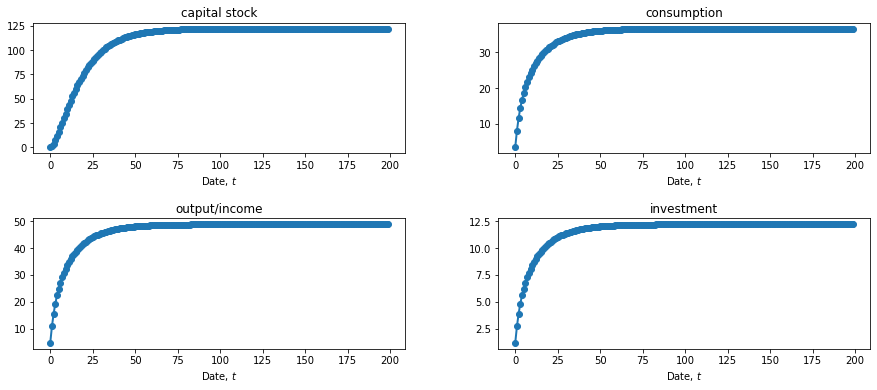

In [10]:
show_dynamics(recursive_evaluation(K, T, L, A, α, δ, s))

**QUESTION 3.** 

1. Now plot (or superimpose) the time path of $K$ you had earlier onto the graph you created at the beginning (i.e., the phase diagram).

2. Comment on what you see and what you can learn about the behavior of the model, in this example.

**Answer 3.**

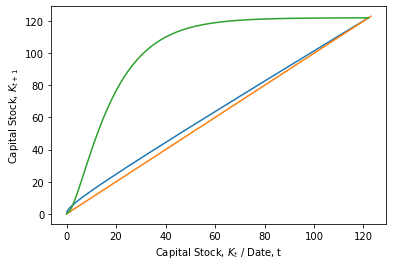

In [11]:
# Question 3: Your code here
serial_correlation(K_path)
plt.plot([0, 123], [0, 123])

# For the sake of good visualisation, only pick the first 123 elements of the simulated pathway
plt.plot(range(123), recursive_evaluation(K, T, L, A, α, δ, s)['capital stock'][:123])

plt.ylabel('Capital Stock, $K_{t+1}$')
plt.xlabel('Capital Stock, $K_{t}$ / Date, t')

plt.show()

The red line is the 45-degree line. The blue curve is the serial-correlation graph of $K$. The green curve is the time path of $K$.
According to the green curve, $K$ is increasing in the beginning, before reaching its dynamic equilibrium at around $K = 120$. The growth rate of $K$ drastically slows down after going above 100. This is consistent with the interaction between the blue curve and the red line, i.e. the serial-correlation graph and the 45-degree line. The blue curve becomes close to the red line after $K_{t} > 100$, and crosses the red line at around $(120, 120)$.






**QUESTION 4.** *This question tests your economic story-telling creativity and mastery of the skills learned thus far*.

![All countries](images/nonconvergence.png)

You are just fresh out of your undegraduate program and working as an intern for the global development bank called *Huanqiu Yinhang* (or HY).

Your supervisors at HY want *a narrative for the observation that many countries overall do not seem to catch up to the rest of the developed nations*, in terms of per-capita income ("living standard"). 

* A motivating figure is that above: On the horizontal axis, we measure the percentage deviation of a country's living standard from that of the US in the year 1960. On the vertical axis, we measure the averaged growth rate between 1960 and 2000. Each dot corresponds to a country. The plot includes a linear regression fit of the scatter plot, with a 95% confidence band calculated using bootsrap methods. 

Provide a simulation or experiment using the model above to illustrate how the model can rationalize this empirical possibility. Be clear about what you can explain from *within* the model's logic and what is your speculation outside of the model. Hint: *Construct two example countries that are all else identical but for one difference*. 

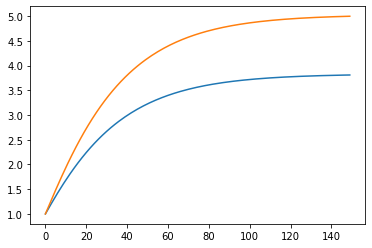

In [12]:
# Question 4: Your code here
T = 150
K = 1.0

plt.plot(range(T), recursive_evaluation(K, T)['capital stock'])
plt.plot(range(T), recursive_evaluation(K, T, A = 1.2)['capital stock'])


**Answer 4.**

*Your explanation of your experimental design within the model setting and of the result(s) you get here.*

The experiment shows that, it is likely the difference in technology/productivity $A$ which results in the failure of convergence towards developed countries in some regions. In this experiment, two countries starts at the same initial capital stock $K_{0}$,  ceteris paribus, only the technology/productivity $A$ is 1.0 for one country, 1.2 for the other. The result of the model simulation shows that the two countries' level of convergence differ significantly. With a 20% rise in the productivity, the level of convergence increases aboun 71%.
The notation $A$ in this case represents not only the level of technology level, but also the human capital involved in the production. For example, the spirit of innovation, a smooth and transparent government structure, a stable social and political environment etc. can all lead to a higher $A$. Therefore, though some countries are not lagging in technology, their living standards might still fail to converge to the developed countries.